In [93]:
# 1. Data Preprocessing
# Step 1: Import relevant libraries:
# Standard libraries for data analysis:
import math
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# sklearn modules for data preprocessing:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

import matplotlib.ticker as mtick

# sklearn modules for Model Selection:
from sklearn.dummy import DummyClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

# sklearn modules for Model Evaluation & Improvement:
from sklearn.metrics import accuracy_score, classification_report, mutual_info_score

from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix

In [2]:
# Step 2: Import the dataset:
df = pd.read_csv('customer-churn-data.csv')

In [3]:
#  Retrieving data heads
print(df.head)

<bound method NDFrame.head of       customerID  gender  SeniorCitizen Partner Dependents  tenure  \
0     7590-VHVEG  Female              0     Yes         No       1   
1     5575-GNVDE    Male              0      No         No      34   
2     3668-QPYBK    Male              0      No         No       2   
3     7795-CFOCW    Male              0      No         No      45   
4     9237-HQITU  Female              0      No         No       2   
...          ...     ...            ...     ...        ...     ...   
7038  6840-RESVB    Male              0     Yes        Yes      24   
7039  2234-XADUH  Female              0     Yes        Yes      72   
7040  4801-JZAZL  Female              0     Yes        Yes      11   
7041  8361-LTMKD    Male              1     Yes         No       4   
7042  3186-AJIEK    Male              0      No         No      66   

     PhoneService     MultipleLines InternetService OnlineSecurity  ...  \
0              No  No phone service             DSL   

In [4]:
# Retrieving data columns
print(df.columns)

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')


In [5]:
# summary of the data frame
print(df.describe())
print(df.info())
print(df.dtypes)

       SeniorCitizen       tenure  MonthlyCharges
count    7043.000000  7043.000000     7043.000000
mean        0.162147    32.371149       64.761692
std         0.368612    24.559481       30.090047
min         0.000000     0.000000       18.250000
25%         0.000000     9.000000       35.500000
50%         0.000000    29.000000       70.350000
75%         0.000000    55.000000       89.850000
max         1.000000    72.000000      118.750000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines  

In [6]:
# Re-validate column data types and missing values:
print(df.columns.to_series().groupby(df.dtypes).groups)

{int64: ['SeniorCitizen', 'tenure'], float64: ['MonthlyCharges'], object: ['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'TotalCharges', 'Churn']}


In [7]:
# isna any
print(df.isna().any())
print(df.isnull().sum())

customerID          False
gender              False
SeniorCitizen       False
Partner             False
Dependents          False
tenure              False
PhoneService        False
MultipleLines       False
InternetService     False
OnlineSecurity      False
OnlineBackup        False
DeviceProtection    False
TechSupport         False
StreamingTV         False
StreamingMovies     False
Contract            False
PaperlessBilling    False
PaymentMethod       False
MonthlyCharges      False
TotalCharges        False
Churn               False
dtype: bool
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Ch

In [8]:
# Identify unique values

# Unique values in each categorical variable:
df["PaymentMethod"].nunique()
df["PaymentMethod"].unique()
df["Contract"].nunique()
df["Contract"].unique()

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

In [9]:
# Step 4: Check target variable distribution:

df["Churn"].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [10]:
# Step 5: Clean the dataset:

# Transform the column TotalCharges into a numeric data type

df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'] = df['TotalCharges'].astype("float")

In [11]:
# Null observations of the TotalCharges column
print(df[df['TotalCharges'].isnull()])

      customerID  gender  SeniorCitizen Partner Dependents  tenure  \
488   4472-LVYGI  Female              0     Yes        Yes       0   
753   3115-CZMZD    Male              0      No        Yes       0   
936   5709-LVOEQ  Female              0     Yes        Yes       0   
1082  4367-NUYAO    Male              0     Yes        Yes       0   
1340  1371-DWPAZ  Female              0     Yes        Yes       0   
3331  7644-OMVMY    Male              0     Yes        Yes       0   
3826  3213-VVOLG    Male              0     Yes        Yes       0   
4380  2520-SGTTA  Female              0     Yes        Yes       0   
5218  2923-ARZLG    Male              0     Yes        Yes       0   
6670  4075-WKNIU  Female              0     Yes        Yes       0   
6754  2775-SEFEE    Male              0      No        Yes       0   

     PhoneService     MultipleLines InternetService       OnlineSecurity  ...  \
488            No  No phone service             DSL                  Yes  ... 

In [12]:
# Drop observations with null values- use of Regex
df['TotalCharges'] = df['TotalCharges'].replace(' ', np.nan)

In [13]:
# Step 6: Take care of missing data:
print(df.isna().any())

customerID          False
gender              False
SeniorCitizen       False
Partner             False
Dependents          False
tenure              False
PhoneService        False
MultipleLines       False
InternetService     False
OnlineSecurity      False
OnlineBackup        False
DeviceProtection    False
TechSupport         False
StreamingTV         False
StreamingMovies     False
Contract            False
PaperlessBilling    False
PaymentMethod       False
MonthlyCharges      False
TotalCharges         True
Churn               False
dtype: bool


In [14]:
print(df.dropna(inplace=True))

None


In [15]:
print('Rows     : ', df.shape[0])

Rows     :  7032


In [16]:
print('Columns  : ', df.shape[1])

Columns  :  21


In [17]:
print('\nFeatures : \n', df.columns.tolist())


Features : 
 ['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']


In [18]:
print('\nMissing values :  ', df.isnull().sum().values.sum())


Missing values :   0


In [19]:
print('\nUnique values :  \n', df.nunique())


Unique values :  
 customerID          7032
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                72
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1584
TotalCharges        6530
Churn                  2
dtype: int64


In [20]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


In [21]:
print(df.isnull().sum())

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [22]:
df = df.drop(columns=['customerID'])

In [23]:
print(df)

      gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0     Female              0     Yes         No       1           No   
1       Male              0      No         No      34          Yes   
2       Male              0      No         No       2          Yes   
3       Male              0      No         No      45           No   
4     Female              0      No         No       2          Yes   
...      ...            ...     ...        ...     ...          ...   
7038    Male              0     Yes        Yes      24          Yes   
7039  Female              0     Yes        Yes      72          Yes   
7040  Female              0     Yes        Yes      11           No   
7041    Male              1     Yes         No       4          Yes   
7042    Male              0      No         No      66          Yes   

         MultipleLines InternetService OnlineSecurity OnlineBackup  \
0     No phone service             DSL             No          Yes   
1      

In [24]:
# Unique elements of the PaymentMethod column
print(df.PaymentMethod.unique())

['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


In [25]:
# Applying Regex to remove (automatic) from payment method names
df['PaymentMethod'] = df['PaymentMethod'].str.replace(' (automatic)', '', regex=True)

In [26]:
# Replace values for SeniorCitizen as a categorical feature
df['SeniorCitizen'] = df['SeniorCitizen'].replace({'1': 'Yes', '0': 'No'})

In [27]:
# Revalidate NA’s:
print(df.isna().any())

gender              False
SeniorCitizen       False
Partner             False
Dependents          False
tenure              False
PhoneService        False
MultipleLines       False
InternetService     False
OnlineSecurity      False
OnlineBackup        False
DeviceProtection    False
TechSupport         False
StreamingTV         False
StreamingMovies     False
Contract            False
PaperlessBilling    False
PaymentMethod       False
MonthlyCharges      False
TotalCharges        False
Churn               False
dtype: bool


In [28]:
# 2. Data Evaluation

# Step 7: Exploratory Data Analysis:

# Step 7.1. Plot histogram of numeric Columns:
df2 = df[['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'PaperlessBilling',
                    'MonthlyCharges', 'TotalCharges']]

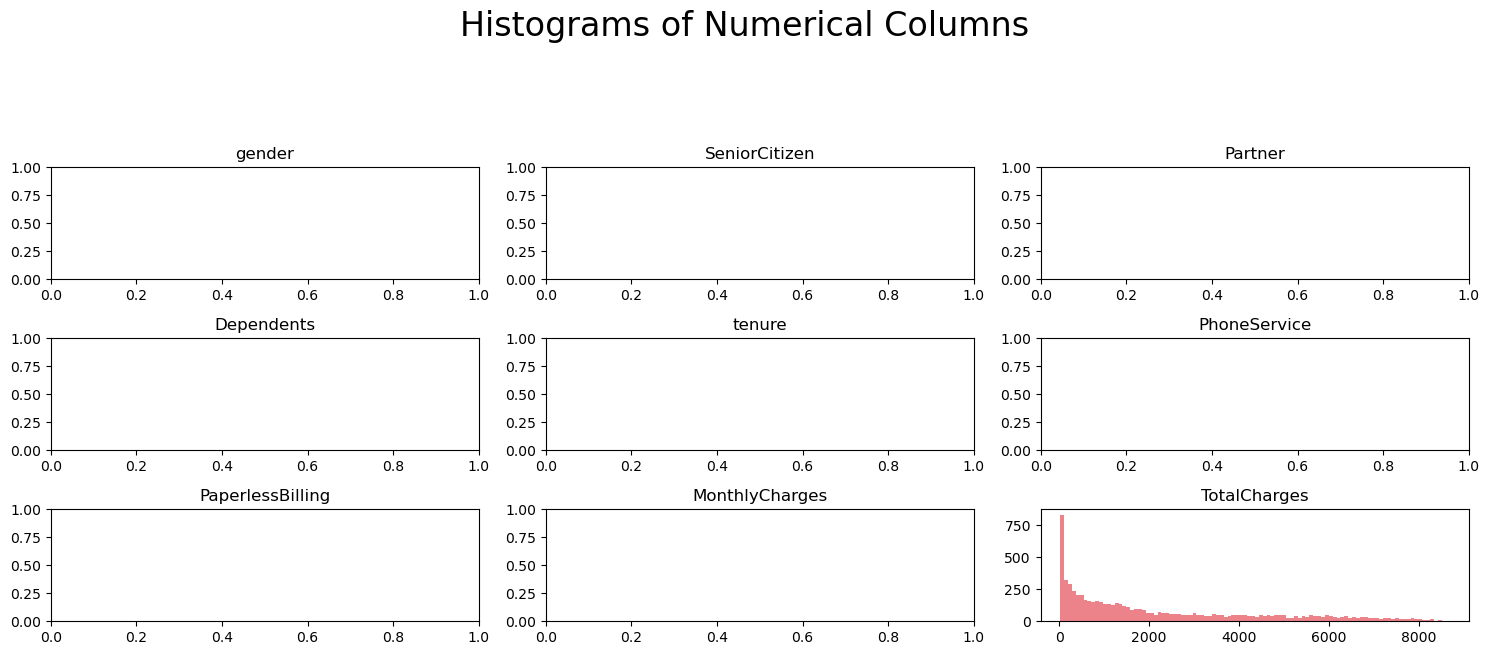

In [29]:
# Histogram:

fig = plt.figure(figsize=(15, 12))
plt.suptitle('Histograms of Numerical Columns\n', horizontalalignment="center", fontstyle="normal", fontsize=24,
             fontfamily="sans-serif")
for i in range(df2.shape[1]):
    plt.subplot(6, 3, i + 1)
    f = plt.gca()
    f.set_title(df2.columns.values[i])

vals = np.size(df2.iloc[:, i].unique())
if vals >= 100:
    vals = 100

plt.hist(df2.iloc[:, i], bins=vals, color='#ec838a')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

In [30]:
def add_value_labels(ax, spacing=5):
    for rect in ax.patches:
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2
        space = spacing
        va = 'bottom'
        if y_value < 0:
            space *= -1
            va = 'top'
        label = "{:.0f}".format(y_value)

        ax.annotate(
            label,
            (x_value, y_value),
            xytext=(0, space),
            textcoords="offset points",
            ha='center',
            va=va)

array([[<AxesSubplot:title={'center':'MonthlyCharges'}>,
        <AxesSubplot:title={'center':'tenure'}>]], dtype=object)

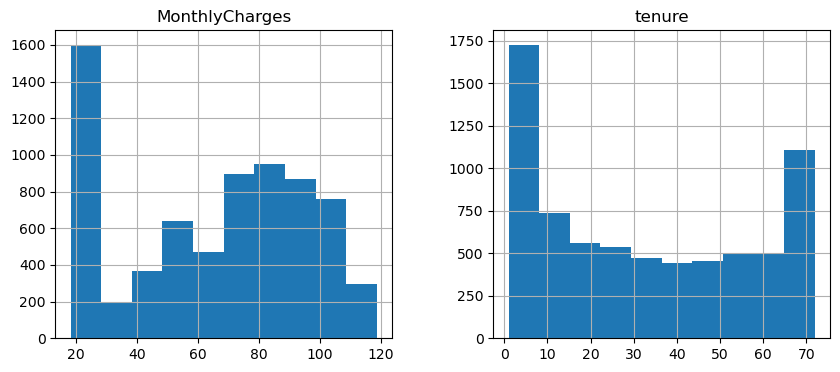

In [31]:
# Quantitative features:
features = ['MonthlyCharges', 'tenure']
df[features].hist(figsize=(10, 4))

C:\Users\Cristian\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='MonthlyCharges', ylabel='Density'>

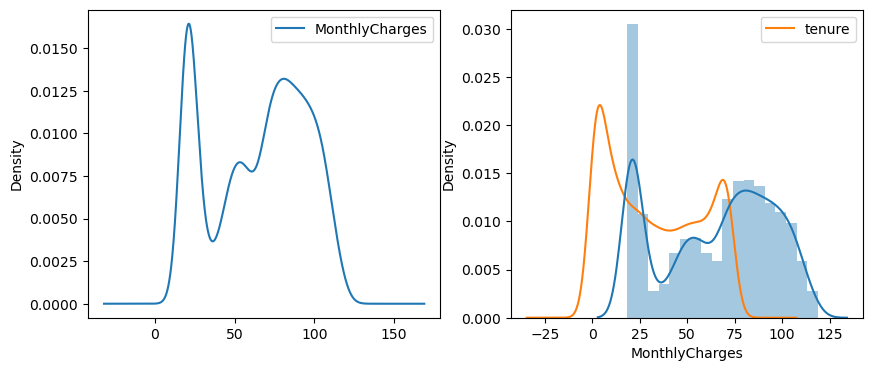

In [32]:
# Density plots
df[features].plot(kind='density', subplots=True, layout=(1, 2),
                  sharex=False, figsize=(10, 4))
x = df['MonthlyCharges']
sns.distplot(x)

<AxesSubplot:xlabel='Churn', ylabel='MonthlyCharges'>

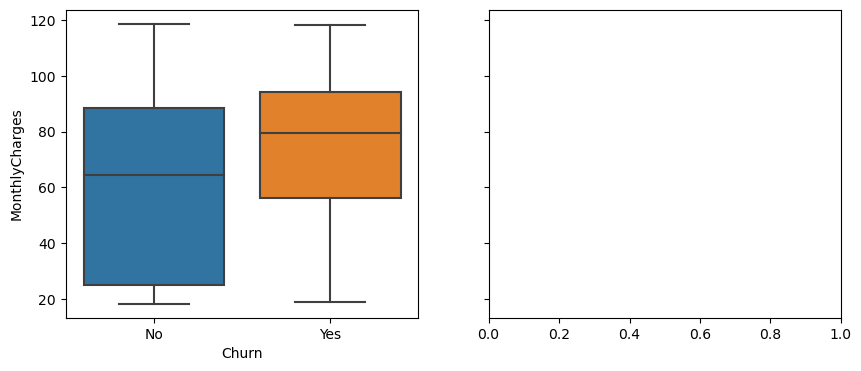

In [33]:
# Box plot

_, axes = plt.subplots(1, 2, sharey=True, figsize=(10, 4))

sns.boxplot(x='Churn', y='MonthlyCharges', data=df, ax=axes[0])

In [34]:
# Violin plot
sns.violinplot(x='Churn', y='MonthlyCharges', data=df, ax=axes[1])

<AxesSubplot:xlabel='Churn', ylabel='MonthlyCharges'>

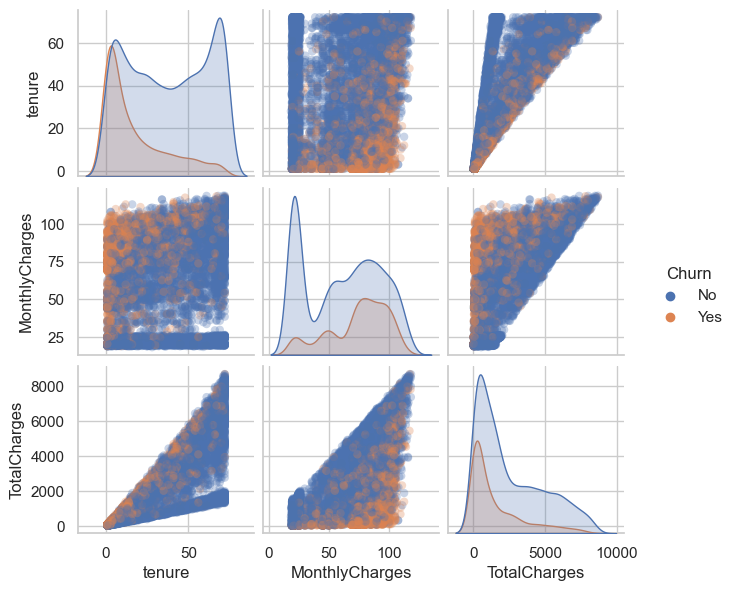

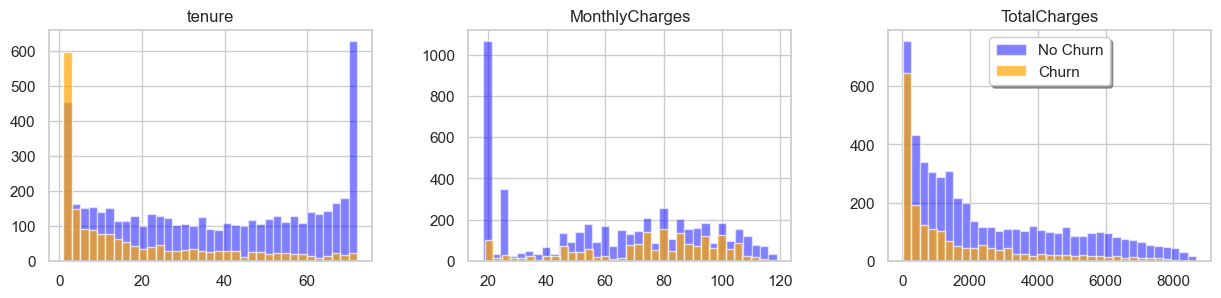

In [35]:
# Data Visualisation
num_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
df[num_cols].describe()
sns.set(style='whitegrid')
sns.pairplot(df[['tenure', 'MonthlyCharges', 'TotalCharges', 'Churn']], hue='Churn', plot_kws=dict(alpha=.3, edgecolor='none'), height=2, aspect=1.1)

fig, ax = plt.subplots(1, 3, figsize=(15, 3))
df[df.Churn == 'No'][num_cols].hist(bins=35, color='blue', alpha=0.5, ax=ax)
df[df.Churn == 'Yes'][num_cols].hist(bins=35, color='orange', alpha=0.7, ax=ax)
plt.legend(['No Churn', 'Churn'], shadow=True, loc=9)

<AxesSubplot:>

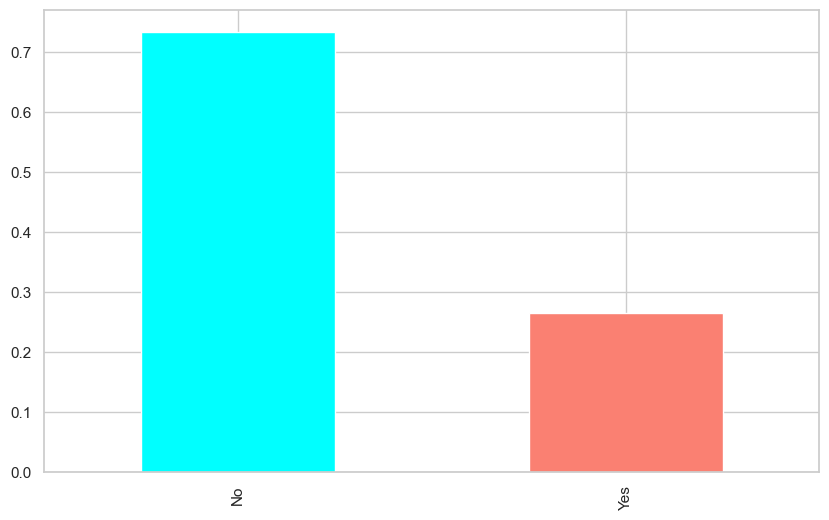

In [39]:
# create a figure
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

# proportion of observation of each class
prop_response = df['Churn'].value_counts(normalize=True)

# create a bar plot showing the percentage of churn
prop_response.plot(kind='bar',
                   ax=ax,
                   color=['cyan', 'salmon'])

In [40]:
# set title and labels
ax.set_title('Proportion of observations of the response variable',
             fontsize=18, loc='left')
ax.set_xlabel('churn',
              fontsize=14)
ax.set_ylabel('proportion of observations',
              fontsize=14)
ax.tick_params(rotation='auto')

In [41]:
# eliminate the frame from the plot
spine_names = ('top', 'right', 'bottom', 'left')
for spine_name in spine_names:
    ax.spines[spine_name].set_visible(False)

In [42]:
def percentage_stacked_plot(columns_to_plot, super_title):
        number_of_columns = 2
        number_of_rows = math.ceil(len(columns_to_plot) / 2)

In [43]:
# demographic column names

# demographic column names
demographic_columns = ['gender', 'SeniorCitizen', 'Partner', 'Dependents']

In [44]:
# stacked plot of demographic columns
percentage_stacked_plot(demographic_columns, 'Demographic Information')

In [45]:
# customer account column names
account_columns = ['Contract', 'PaperlessBilling', 'PaymentMethod']

In [46]:
# stacked plot of customer account columns
percentage_stacked_plot(account_columns, 'Customer Account Information')

In [47]:
def histogram_plots(columns_to_plot, super_title):

    # set number of rows and number of columns

    number_of_columns = 2
    number_of_rows = math.ceil(len(columns_to_plot) / 2)

    # create a figure
    fig = plt.figure(figsize=(12, 5 * number_of_rows))
    fig.suptitle(super_title, fontsize=22, y=.95)

    # loop to each demographic column name to create a subplot
    for index, column in enumerate(columns_to_plot, 1):

        # create the subplot
        ax = fig.add_subplot(number_of_rows, number_of_columns, index)

        # histograms for each class (normalized histogram)
        df[df['Churn'] == 'No'][column].plot(kind='hist', ax=ax, density=True,
                                             alpha=0.5, color='cyan', label='No')
        df[df['Churn'] == 'Yes'][column].plot(kind='hist', ax=ax, density=True,
                                              alpha=0.5, color='yellow', label='Yes')


        # set the legend in the upper right corner
        ax.legend(loc="upper right", bbox_to_anchor=(0.5, 0.5, 0.5, 0.5),
                  title='Churn', fancybox=True)

        # set title and labels
        ax.set_title('Distribution of ' + column + ' by churn',
                     fontsize=16, loc='left')

        ax.tick_params(rotation='auto')

        # eliminate the frame from the plot
        spine_names = ('top', 'right', 'bottom', 'left')
        for spine_name in spine_names:
            ax.spines[spine_name].set_visible(False)


In [48]:
# customer account column names
account_columns_numeric = ['tenure', 'MonthlyCharges', 'TotalCharges']

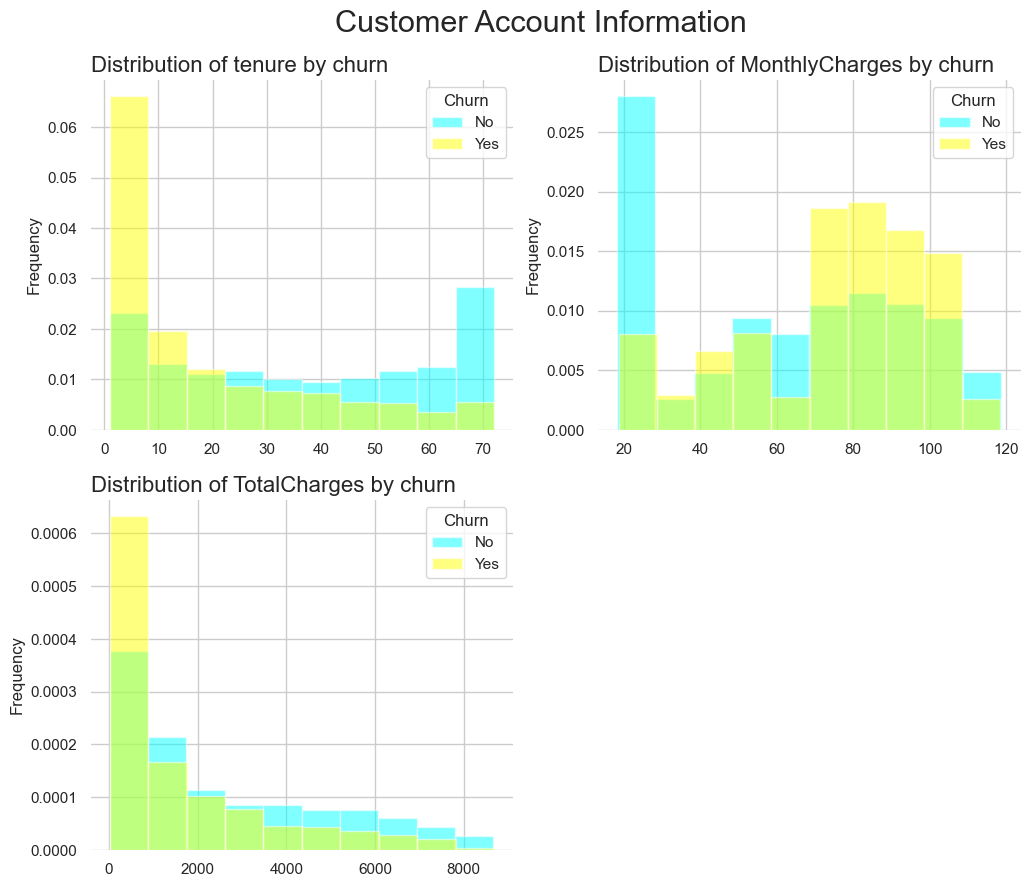

In [49]:
# histogram of costumer account columns
histogram_plots(account_columns_numeric, 'Customer Account Information')

In [50]:
# services column names
services_columns = ['PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
                    'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

In [51]:
# stacked plot of services columns
percentage_stacked_plot(services_columns, 'Services Information')

In [52]:
# function that computes the mutual infomation score between a categorical series and the column Churn

def compute_mutual_information(categorical_serie):
    return mutual_info_score(categorical_serie, df.Churn)

In [53]:
# select categorial variables excluding the response variable
categorical_variables = df.select_dtypes(include=object).drop('Churn', axis=1)

In [54]:
# compute the mutual information score between each categorical variable and the target
feature_importance = categorical_variables.apply(compute_mutual_information).sort_values(ascending=False)

In [55]:
# visualize feature importance
print(feature_importance)

Contract            0.098182
OnlineSecurity      0.064528
TechSupport         0.062873
InternetService     0.055394
OnlineBackup        0.046659
PaymentMethod       0.044423
DeviceProtection    0.043784
StreamingMovies     0.031918
StreamingTV         0.031803
PaperlessBilling    0.019119
Dependents          0.014270
Partner             0.011383
MultipleLines       0.000798
PhoneService        0.000069
gender              0.000037
dtype: float64


In [56]:
df_telco_transformed = df.copy()

In [57]:
# label encoding (binary variables)
label_encoding_columns = ['gender', 'Partner', 'Dependents', 'PaperlessBilling', 'PhoneService', 'Churn']

In [58]:
# encode categorical binary features using label encoding
for column in label_encoding_columns:
    if column == 'gender':
        df_telco_transformed[column] = df_telco_transformed[column].map({'Female': 1, 'Male': 0})
    else:
        df_telco_transformed[column] = df_telco_transformed[column].map({'Yes': 1, 'No': 0})
# one-hot encoding (categorical variables with more than two levels)
one_hot_encoding_columns = ['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                            'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaymentMethod']

In [59]:
# encode categorical variables with more than two levels using one-hot encoding
df_telco_transformed = pd.get_dummies(df_telco_transformed, columns=one_hot_encoding_columns)

In [60]:
# min-max normalization (numeric variables)
min_max_columns = ['tenure', 'MonthlyCharges', 'TotalCharges']

In [61]:
# scale numerical variables using min max scaler
for column in min_max_columns:
    # minimum value of the column
    min_column = df_telco_transformed[column].min()
    # maximum value of the column
    max_column = df_telco_transformed[column].max()
    # min max scaler
    df_telco_transformed[column] = (df_telco_transformed[column] - min_column) / (max_column - min_column)

In [62]:
# select independent variables
X = df_telco_transformed.drop(columns='Churn')

In [63]:
# select dependent variables
y = df_telco_transformed.loc[:, 'Churn']

In [64]:
# prove that the variables were selected correctly
print(X.columns)

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'PaperlessBilling', 'MonthlyCharges', 'TotalCharges',
       'MultipleLines_No', 'MultipleLines_No phone service',
       'MultipleLines_Yes', 'InternetService_DSL',
       'InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_No', 'OnlineSecurity_No internet service',
       'OnlineSecurity_Yes', 'OnlineBackup_No',
       'OnlineBackup_No internet service', 'OnlineBackup_Yes',
       'DeviceProtection_No', 'DeviceProtection_No internet service',
       'DeviceProtection_Yes', 'TechSupport_No',
       'TechSupport_No internet service', 'TechSupport_Yes', 'StreamingTV_No',
       'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No', 'StreamingMovies_No internet service',
       'StreamingMovies_Yes', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit 

In [65]:
# prove that the variables were selected correctly
print(y.name)

Churn


In [66]:
# split the data in training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,
                                                    random_state=40, shuffle=True)

In [67]:
def create_models(seed=2):
    '''
    Create a list of machine learning models.
            Parameters:
                    seed (integer): random seed of the models
            Returns:
                    models (list): list containing the models
    '''

    models = []
    models.append(('dummy_classifier', DummyClassifier(random_state=seed, strategy='most_frequent')))
    models.append(('k_nearest_neighbors', KNeighborsClassifier()))
    models.append(('logistic_regression', LogisticRegression(random_state=seed, solver='lbfgs', max_iter=1000)))
    models.append(('support_vector_machines', SVC(random_state=seed)))
    models.append(('random_forest', RandomForestClassifier(random_state=seed)))
    models.append(('gradient_boosting', GradientBoostingClassifier(random_state=seed)))

    return models

In [68]:
# create a list with all the algorithms we are going to assess
models = create_models()

In [69]:
# test the accuracy of each model using default hyperparameters

results = []
names = []
scoring = 'accuracy'
for name, model in models:
    # fit the model with the training data
    model.fit(X_train, y_train).predict(X_test)


    # make predictions with the testing data
    predictions = model.predict(X_test)
    # calculate accuracy
    accuracy = accuracy_score(y_test, predictions)
    # append the model name and the accuracy to the lists
    results.append(accuracy)
    names.append(name)

    # print classifier accuracy
    print('Classifier: {}, Accuracy: {})'.format(name, accuracy))

Classifier: dummy_classifier, Accuracy: 0.745164960182025)


C:\Users\Cristian\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Cristian\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `k

Classifier: k_nearest_neighbors, Accuracy: 0.7531285551763367)
Classifier: logistic_regression, Accuracy: 0.7923777019340159)
Classifier: support_vector_machines, Accuracy: 0.7878270762229806)
Classifier: random_forest, Accuracy: 0.7713310580204779)
Classifier: gradient_boosting, Accuracy: 0.7963594994311718)


In [70]:
# define the parameter grid
grid_parameters = {'n_estimators': [80, 90, 100, 110, 115, 120],
                   'max_depth': [3, 4, 5, 6],
                   'max_features': [None, 'auto', 'sqrt', 'log2'],
                   'min_samples_split': [2, 3, 4, 5]}

In [71]:
# define the RandomizedSearchCV class for trying different parameter combinations
random_search = RandomizedSearchCV(estimator=GradientBoostingClassifier(),
                                   param_distributions=grid_parameters,
                                   cv=5,
                                   n_iter=330,
                                   n_jobs=-1)

In [83]:
# fitting the model for random search
random_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=GradientBoostingClassifier(), n_iter=330,
                   n_jobs=-1,
                   param_distributions={'max_depth': [3, 4, 5, 6],
                                        'max_features': [None, 'auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_split': [2, 3, 4, 5],
                                        'n_estimators': [80, 90, 100, 110, 115,
                                                         120]})

In [84]:
# print best parameter after tuning
print('best parameter after tuning', random_search.best_params_)


best parameter after tuning {'n_estimators': 80, 'min_samples_split': 5, 'max_features': 'log2', 'max_depth': 3}


In [94]:
# make the predictions
random_search_predictions = random_search.predict(X_test)

# construct the confusion matrix
confusion_matrix = confusion_matrix(y_test, random_search_predictions)


# visualize the confusion matrix
print('confusion_matrix', confusion_matrix)



confusion_matrix [[1151  159]
 [ 197  251]]


In [87]:
# print classification report

print('classification report', classification_report(y_test, random_search_predictions))

classification report               precision    recall  f1-score   support

           0       0.85      0.88      0.87      1310
           1       0.61      0.56      0.59       448

    accuracy                           0.80      1758
   macro avg       0.73      0.72      0.73      1758
weighted avg       0.79      0.80      0.79      1758



In [88]:
# print the accuracy of the model
print(' accuracy of the model', accuracy_score(y_test, random_search_predictions))

 accuracy of the model 0.7974971558589306
